In [52]:
# importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [53]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [54]:
# getting the basic information about the columns and their data-type.
df.info()

# all columns are in numerical format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [55]:
# checking for duplicate entries.
df.duplicated().value_counts()
# didn't find any.

False    30
dtype: int64

In [56]:
# checking for any null values column-wise.
df.isnull().sum()
# didn't find any.

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

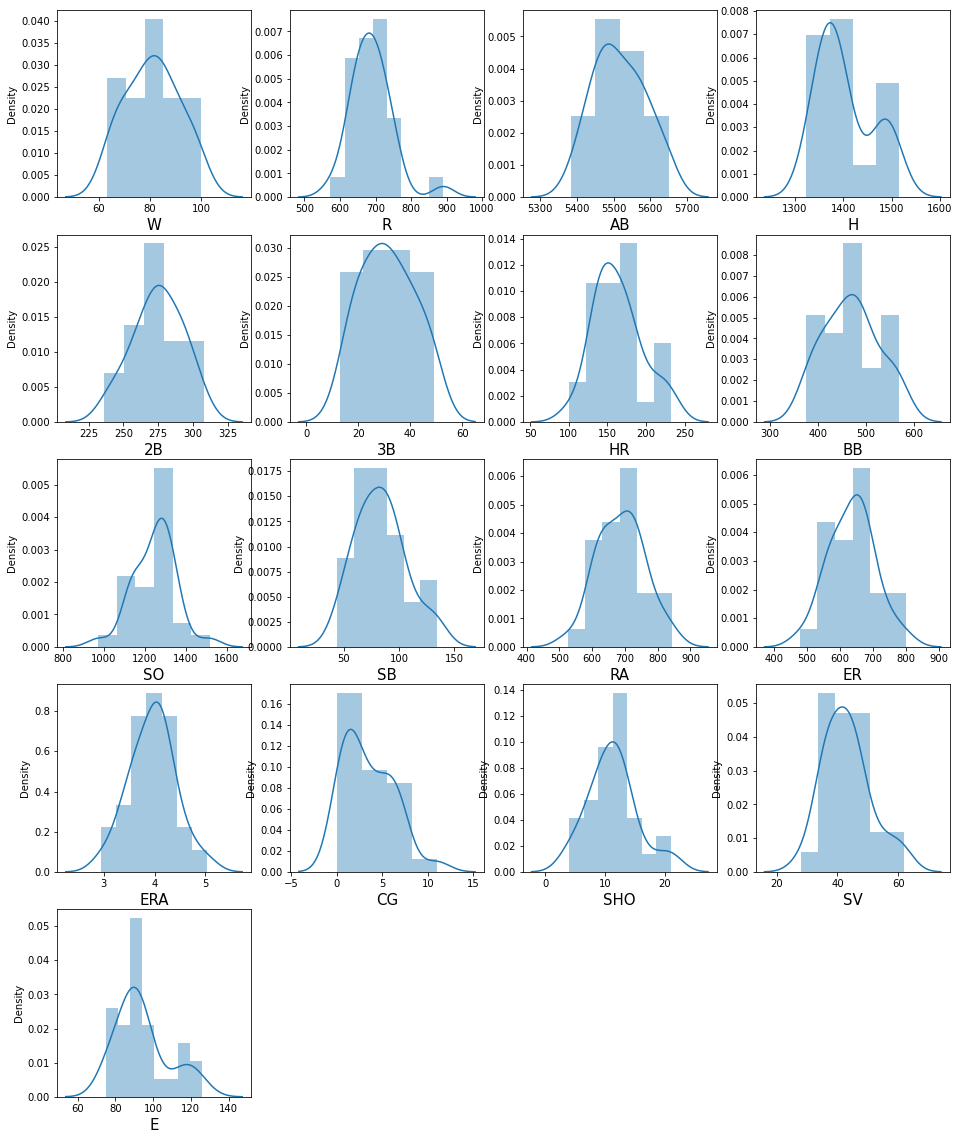

In [57]:
# let's see a basic overview of the data distribution using distplot.
plt.figure(figsize=(16,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax= plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

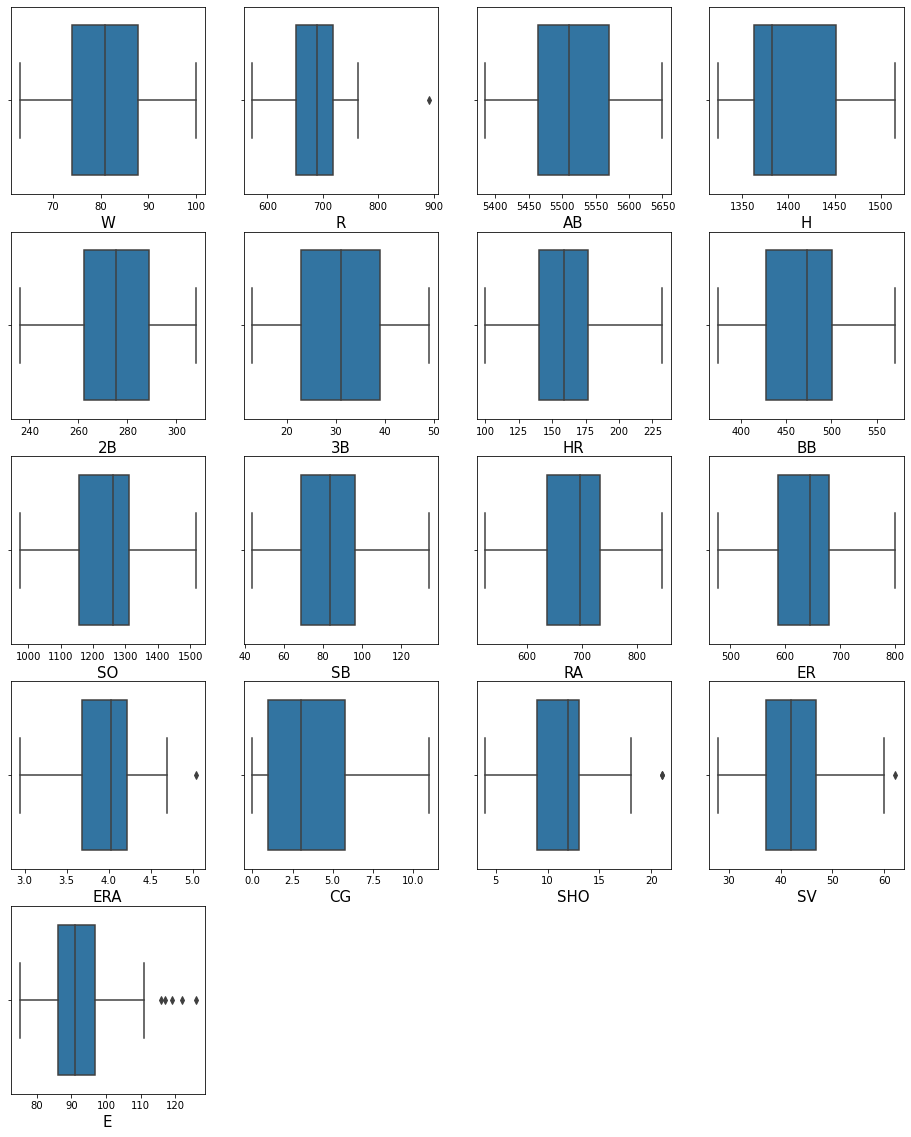

In [58]:
# Let's see the boxplots to check for outliers.
plt.figure(figsize=(16,20))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax= plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Most of the columns doesn't have outliers except a R,ERA,CG,SHO,SV and E columns.
# The E(errors) column seems to have the highest number of outliers.

In [59]:
# Removing outliers using z-score.
from scipy.stats import zscore
z_score= zscore(df[['R','ERA','SHO','SV','E']])
abs_zscore= np.abs(z_score)
filtering_entry= (abs_zscore<3).all(axis=1)
df=df[filtering_entry]
df.shape

(29, 17)

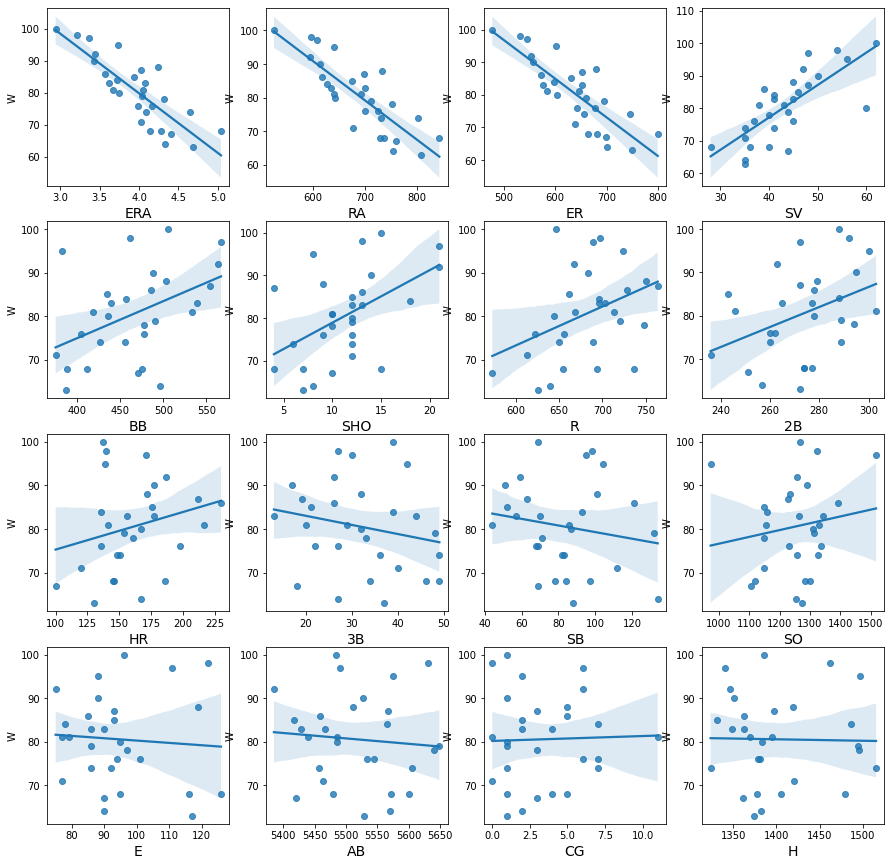

In [60]:
# Let's see the regplots of our features with the label.
columns= df[['ERA','RA','ER','SV','BB','SHO','R','2B','HR','3B','SB','SO','E','AB','CG','H']]
plt.figure(figsize=(15,15))
plotnumber=1
for i in columns:
    if plotnumber<=16:
        ax= plt.subplot(4,4,plotnumber)
        sns.regplot(x=columns[i],y=df['W'])
        plt.xlabel(i,fontsize=14)
    plotnumber+=1
plt.show()

# ERA(Earned Run Average), RA(Runs Allowed) and ER(Earned Runs) have a direct negative linear relationship with W(Wins)
# SV have a direct positive linear relation with W.
# BB, SHO, R, 2B, HR and SO have a positive correlation with Wins but the correlation is not that strong.
# 3B and SB have a negative correlation with wins but weakly related.
# Other features seems to be very weakly related to wins.

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,29.0,80.551724,10.384006,63.00,74.00,81.00,87.00,100.00
R,29.0,681.241379,45.357040,573.00,650.00,689.00,713.00,764.00
AB,29.0,5516.517241,71.701076,5385.00,5463.00,5511.00,5571.00,5649.00
H,29.0,1400.896552,56.264265,1324.00,1363.00,1382.00,1420.00,1515.00
2B,29.0,273.586207,17.269952,236.00,262.00,274.00,288.00,303.00
3B,29.0,31.793103,10.276114,13.00,26.00,32.00,39.00,49.00
HR,29.0,161.275862,29.600792,100.00,140.00,156.00,177.00,230.00
BB,29.0,465.620690,54.728821,375.00,426.00,471.00,496.00,567.00
SO,29.0,1251.551724,103.930123,973.00,1159.00,1264.00,1312.00,1518.00
SB,29.0,83.344828,23.202949,44.00,69.00,83.00,97.00,134.00


<AxesSubplot:>

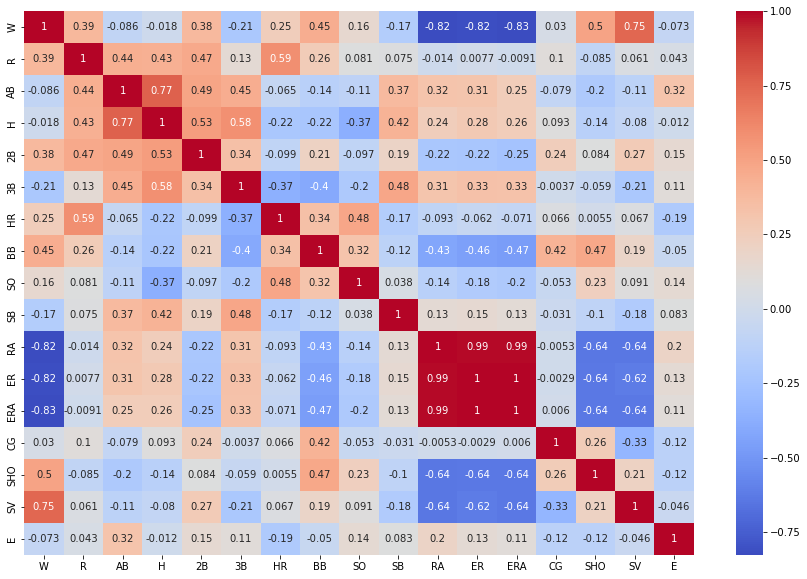

In [62]:
# Let's see the correlation heatmap.
corr= df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# RA(Runs Allowed), ERA(Earned Run Average) and ER(Earned Runs) seems to be highly correlated to each other.
# H(Hits) and AB(At Bats) might be correlated.

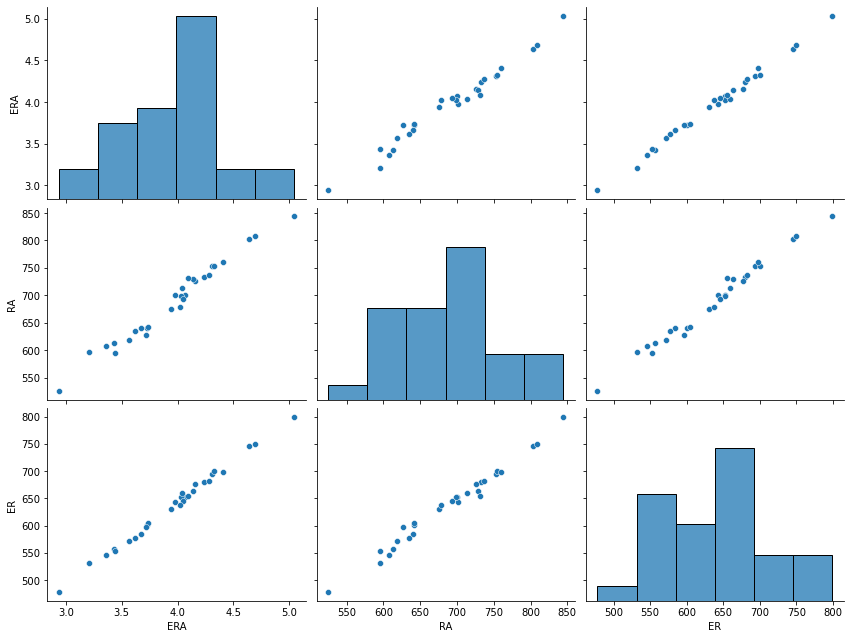

In [63]:
# Let's see the pairplots of RA(Runs Allowed), ERA(Earned Run Average) and ER(Earned Runs) with each other.
columns= df[['ERA','RA','ER']]
sns.pairplot(columns, height=3, aspect=4/3)

# It can be seen that 'ERA','RA' and 'ER' have a direct linear relationship with each other.

<AxesSubplot:xlabel='H', ylabel='AB'>

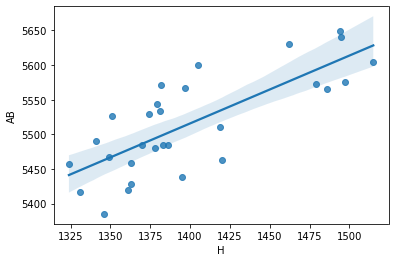

In [64]:
# Let's see the regplot of H(Hits) vs AB(At Bats)
sns.regplot(x=df['H'],y=df['AB'])

# Both have a positive linear relation.

In [65]:
# Let's check the absolute value of correlation of our features with the label in descending order.
np.abs(corr["W"]).sort_values(ascending= False)

# CG(Shutouts) and H(Hits) seems to have a very weak relation with the wins.

W      1.000000
ERA    0.826952
RA     0.823176
ER     0.815308
SV     0.749290
SHO    0.497526
BB     0.447513
R      0.390451
2B     0.384886
HR     0.245697
3B     0.206737
SB     0.169503
SO     0.156469
AB     0.085780
E      0.072858
CG     0.029594
H      0.018360
Name: W, dtype: float64

In [66]:
# dropping the columns as they have a very weak relation with W(wins)
df.drop(columns=['CG','H'],inplace=True)

In [67]:
# Checking the skewness in our features.
df.skew()

# 'SHO','SV' and 'E' columns have some skewness.

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [68]:
# applying power-transformation on the columns to reduce skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="box-cox")

def power_transform(column):
    df[column]= pt.fit_transform(df[[column]])
    
columns= df[['SHO','SV','E']]
for i in columns:
    power_transform(i)

In [69]:
# checking the skewness after applying power-transformation.
df.skew()

# all values are in the acceptable range of (-0.5,0.5)

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO   -0.000201
SV    -0.000857
E      0.065150
dtype: float64

In [70]:
# Separating target variable and features.
X= df.drop(columns=["W"])
y= df["W"]

# Scaling the data using Standard-Scaler.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [71]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# RA, ERA and ER have very high vif score which is not surprising as we already saw their correlation in the plots above.

            vif Features
0      6.218854        R
1      9.827694       AB
2      2.683468       2B
3      3.195905       3B
4      7.369885       HR
5      2.684916       BB
6      2.740773       SO
7      1.756745       SB
8    179.037691       RA
9   1754.811798       ER
10  1310.361474      ERA
11     3.083346      SHO
12     4.021610       SV
13     1.742218        E


In [72]:
# Dropping the 'RA' and 'ER' columns. Since 'ERA' has highest correlation coefficient with Wins hence choosing to drop the other two.
df.drop(columns=['RA','ER'], inplace=True)

In [73]:
# Separating target variable and features.
X= df.drop(columns=["W"])
y= df["W"]

# Scaling the data using Standard-Scaler.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

#checking vif score again.
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

         vif Features
0   4.250108        R
1   2.238306       AB
2   2.597721       2B
3   3.028798       3B
4   4.561970       HR
5   2.222218       BB
6   2.042847       SO
7   1.567546       SB
8   3.876228      ERA
9   2.649798      SHO
10  1.954312       SV
11  1.493015        E


In [74]:
############################################### LINEAR REGRESSION ##############################################################

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr_mae=[]

for i in range(0,15):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)
 
    lr.fit(x_train,y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")
    
    lr_mae.append(mean_absolute_error(y_test,y_pred))

Training Score for sample 0 : 95.84
Testing Score for sample 0 : 33.06
Mean Absolute Error 4.45
Root Mean Squared Error 6.17


Training Score for sample 1 : 92.64
Testing Score for sample 1 : 85.98
Mean Absolute Error 3.04
Root Mean Squared Error 3.95


Training Score for sample 2 : 94.1
Testing Score for sample 2 : -28.01
Mean Absolute Error 6.86
Root Mean Squared Error 7.6


Training Score for sample 3 : 96.47
Testing Score for sample 3 : 44.05
Mean Absolute Error 6.97
Root Mean Squared Error 9.03


Training Score for sample 4 : 93.99
Testing Score for sample 4 : 77.08
Mean Absolute Error 3.76
Root Mean Squared Error 4.64


Training Score for sample 5 : 95.21
Testing Score for sample 5 : 36.1
Mean Absolute Error 4.94
Root Mean Squared Error 6.71


Training Score for sample 6 : 95.05
Testing Score for sample 6 : 59.82
Mean Absolute Error 5.56
Root Mean Squared Error 6.79


Training Score for sample 7 : 92.18
Testing Score for sample 7 : 84.95
Mean Absolute Error 3.23
Root Mean Squared

In [75]:
############################################## RANDOM FOREST REGRESSION ########################################################

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_jobs=-1)
rf_mae=[]

for i in range(0,15):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)

    rf.fit(x_train,y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")
    
    rf_mae.append(mean_absolute_error(y_test,y_pred))

Training Score for sample 0 : 93.0
Testing Score for sample 0 : 59.81
Mean Absolute Error 3.8
Root Mean Squared Error 4.78


Training Score for sample 1 : 93.43
Testing Score for sample 1 : 75.5
Mean Absolute Error 3.99
Root Mean Squared Error 5.22


Training Score for sample 2 : 91.99
Testing Score for sample 2 : -93.05
Mean Absolute Error 8.09
Root Mean Squared Error 9.33


Training Score for sample 3 : 92.84
Testing Score for sample 3 : 62.26
Mean Absolute Error 6.85
Root Mean Squared Error 7.41


Training Score for sample 4 : 90.97
Testing Score for sample 4 : 68.24
Mean Absolute Error 4.7
Root Mean Squared Error 5.46


Training Score for sample 5 : 93.61
Testing Score for sample 5 : 52.31
Mean Absolute Error 5.0
Root Mean Squared Error 5.8


Training Score for sample 6 : 93.08
Testing Score for sample 6 : 63.13
Mean Absolute Error 5.2
Root Mean Squared Error 6.5


Training Score for sample 7 : 94.81
Testing Score for sample 7 : 32.79
Mean Absolute Error 7.86
Root Mean Squared Erro

In [76]:
################################################# ADABOOST REGRESSION ##########################################################

from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_mae=[]

for i in range(0,15):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)

    ada.fit(x_train, y_train)

    y_pred_train = ada.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= ada.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")
    
    ada_mae.append(mean_absolute_error(y_test,y_pred))

Training Score for sample 0 : 99.3
Testing Score for sample 0 : 53.47
Mean Absolute Error 4.43
Root Mean Squared Error 5.14


Training Score for sample 1 : 97.87
Testing Score for sample 1 : 63.16
Mean Absolute Error 5.52
Root Mean Squared Error 6.4


Training Score for sample 2 : 97.82
Testing Score for sample 2 : -94.81
Mean Absolute Error 7.85
Root Mean Squared Error 9.37


Training Score for sample 3 : 97.83
Testing Score for sample 3 : 61.7
Mean Absolute Error 6.74
Root Mean Squared Error 7.47


Training Score for sample 4 : 99.41
Testing Score for sample 4 : 77.75
Mean Absolute Error 4.05
Root Mean Squared Error 4.57


Training Score for sample 5 : 99.58
Testing Score for sample 5 : 56.9
Mean Absolute Error 4.77
Root Mean Squared Error 5.51


Training Score for sample 6 : 99.07
Testing Score for sample 6 : 65.59
Mean Absolute Error 5.23
Root Mean Squared Error 6.28


Training Score for sample 7 : 99.54
Testing Score for sample 7 : 40.36
Mean Absolute Error 7.27
Root Mean Squared 

In [77]:
############################################## K-NEIGHBORS REGRESSION ##########################################################

from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()
knr_mae=[]

for i in range(0,15):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)
   
    knr.fit(x_train,y_train)

    y_pred_train = knr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")
    
    knr_mae.append(mean_absolute_error(y_test,y_pred))

Training Score for sample 0 : 66.09
Testing Score for sample 0 : 46.94
Mean Absolute Error 4.7
Root Mean Squared Error 5.49


Training Score for sample 1 : 63.1
Testing Score for sample 1 : 65.16
Mean Absolute Error 5.28
Root Mean Squared Error 6.22


Training Score for sample 2 : 61.28
Testing Score for sample 2 : -86.64
Mean Absolute Error 8.05
Root Mean Squared Error 9.18


Training Score for sample 3 : 67.14
Testing Score for sample 3 : 54.47
Mean Absolute Error 7.45
Root Mean Squared Error 8.14


Training Score for sample 4 : 68.26
Testing Score for sample 4 : 52.64
Mean Absolute Error 5.62
Root Mean Squared Error 6.67


Training Score for sample 5 : 73.04
Testing Score for sample 5 : 78.7
Mean Absolute Error 3.38
Root Mean Squared Error 3.87


Training Score for sample 6 : 69.72
Testing Score for sample 6 : 66.14
Mean Absolute Error 5.15
Root Mean Squared Error 6.23


Training Score for sample 7 : 70.61
Testing Score for sample 7 : 40.55
Mean Absolute Error 7.33
Root Mean Squared

In [78]:
######################################### XTREME-GRADIENT BOOST REGRESSION #####################################################

import xgboost as xgb
xgb= xgb.XGBRegressor()
xgb_mae=[]

for i in range(0,15):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    xgb.fit(x_train,y_train)

    y_pred_train = xgb.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= xgb.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")
    
    xgb_mae.append(mean_absolute_error(y_test,y_pred))

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 55.49
Mean Absolute Error 5.07
Root Mean Squared Error 5.72


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 65.32
Mean Absolute Error 4.55
Root Mean Squared Error 6.96


Training Score for sample 2 : 100.0
Testing Score for sample 2 : -132.53
Mean Absolute Error 7.4
Root Mean Squared Error 9.46


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 72.55
Mean Absolute Error 6.51
Root Mean Squared Error 6.86


Training Score for sample 4 : 100.0
Testing Score for sample 4 : 77.66
Mean Absolute Error 3.33
Root Mean Squared Error 4.45


Training Score for sample 5 : 100.0
Testing Score for sample 5 : 66.19
Mean Absolute Error 4.63
Root Mean Squared Error 4.93


Training Score for sample 6 : 100.0
Testing Score for sample 6 : 63.04
Mean Absolute Error 6.19
Root Mean Squared Error 7.41


Training Score for sample 7 : 100.0
Testing Score for sample 7 : 16.33
Mean Absolute Error 5.25
Root Mean Squa

In [ ]:
# It can be seen that all the models give different r2 score for different train-test splits.
# Let's check the mean of the mean-absolute-errors of different splits for different models.

In [79]:
print("Linear Regression:",np.mean(lr_mae))
print("Random Forests:",np.mean(rf_mae))
print("Adaboost Regression:",np.mean(ada_mae))
print("K-Neighbors Regression:",np.mean(knr_mae))
print("XGBoost:",np.mean(xgb_mae))

Linear Regression: 4.7784984991437
Random Forests: 5.750666666666666
Adaboost Regression: 5.784366605616606
K-Neighbors Regression: 5.831666666666668
XGBoost: 5.065354749891493


In [ ]:
 # Linear Regression have the lest average-MAE among all the models. Let's cross validate our models.

In [80]:
# cross-validating the linear regression model.
for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 37.36
the cv score for 6 fold: 30.26
the cv score for 7 fold: 19.03
the cv score for 8 fold: 23.25
the cv score for 9 fold: -654.03


In [81]:
# cross-validating the random forests regression model.
for i in range(5,10):
    cv_score= cross_val_score(rf,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: -61.47
the cv score for 6 fold: -37.86
the cv score for 7 fold: -14.35
the cv score for 8 fold: -30.42
the cv score for 9 fold: -1262.84


In [82]:
# cross-validating the adaboost regression model.
for i in range(5,10):
    cv_score= cross_val_score(ada,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: -50.21
the cv score for 6 fold: -79.6
the cv score for 7 fold: 2.89
the cv score for 8 fold: -50.86
the cv score for 9 fold: -1362.5


In [83]:
# cross-validating the k-neighbors regression model.
for i in range(5,10):
    cv_score= cross_val_score(knr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 2.55
the cv score for 6 fold: 34.27
the cv score for 7 fold: 20.13
the cv score for 8 fold: 11.56
the cv score for 9 fold: -1612.96


In [84]:
# cross-validating the xgboost regression model.
for i in range(5,10):
    cv_score= cross_val_score(xgb,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: -92.96
the cv score for 6 fold: -64.69
the cv score for 7 fold: -77.39
the cv score for 8 fold: -72.1
the cv score for 9 fold: -1209.36


In [ ]:
# Random-Forests, Adaboost, and XGBoost are giving negative cross validation scores. It means that their predictions are worse 
# than a horizontal line.

# Linear Regression and K-Neighbors Regression are giving better results in cross-validation except in 9-fold.
# Since the MAE of Linear Regression is better than K-Neighbors hence let's choose it and save the model.

In [85]:
# saving the model using pickle
import pickle 

Baseball= "Baseball_model.pickle"
pickle.dump(lr, open(Baseball,'wb'))